<a href="https://colab.research.google.com/github/Naomi-NLP/Sentiment-Analysis-Project/blob/main/Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

### **Import** **necessary** **libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load** **dataset**

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IMDB Dataset.csv')

In [ ]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Shape** **of** **the** **dataset**

In [ ]:
data.shape

(50000, 2)

**Descriptive statistics of the dataset**

In [ ]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**Summarry of the dataset**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# **Data preprocessing**

**Check Missing Values**

In [ ]:
data.isnull().any()

,0
review,False
sentiment,False


In [ ]:
data.isnull().sum()

,0
review,0
sentiment,0


In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.shape

(50000, 2)

## **Test** **normalization**

# **Import necessary libraries**

In [ ]:
import nltk
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer

In [ ]:
!pip install wordcloud

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize

In [ ]:
!pip install textblob
#Installs the textblob package.
import spacy
import re, string, unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Function to clean and normalize text
def preprocess_text(text):
    # Remove HTML tags
    from bs4 import BeautifulSoup #Imports the BeautifulSoup module from bs4
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Rejoin tokens into a single string
    return ' '.join(tokens)

# Apply preprocessing to the review text
data['cleaned_review'] = data['review'].apply(preprocess_text)

# Check the cleaned data
print(data.head())

<ipython-input-18-e5b6eed4b542>:5: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  
0  one reviewer mentioned watching oz episode you...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically there family little boy jake think t...  
4  petter matteis love time money visually stunni...  


In [ ]:
data.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewer mentioned watching oz episode you...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically there family little boy jake think t...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


# **Exploratory Data Analysis**

In [ ]:
data['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


In [ ]:
data.columns

Index(['review', 'sentiment', 'cleaned_review'], dtype='object')

In [ ]:
# Check for the last 5 rows
data.tail()

,review,sentiment,cleaned_review
49995,I thought this movie did a down right good job...,positive,thought movie right good job wasnt creative or...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,negative,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,negative,im going disagree previous comment side maltin...
49999,No one expects the Star Trek movies to be high...,negative,one expects star trek movie high art fan expec...


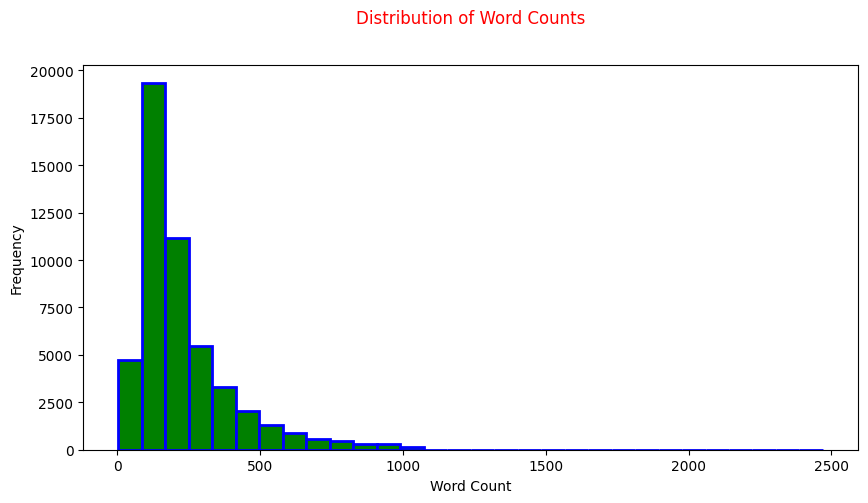

In [ ]:
data['word_count'] = data['review'].apply(lambda x: len(x.split()))
data['char_count'] = data['review'].apply(lambda x: len(x))

# Visualizing the distribution of word counts
data['word_count'].hist(bins=30)
data["word_count"].plot(kind = "hist", bins = 30, edgecolor = "blue", linewidth = 2, color = "green", figsize = (10,5))
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.title("Distribution of Word Counts", color = "red", pad = 30)


plt.show()

Text(0.5, 1.0, 'Distribution of sentiment')

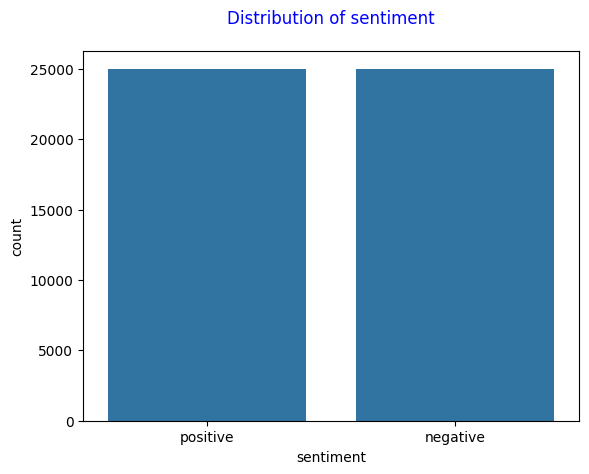

In [ ]:
# Plotting the distribution of sentiments
sns.countplot(x='sentiment', data=data)
plt.title("Distribution of sentiment", color = "blue", pad = 20)

# Pie Chart

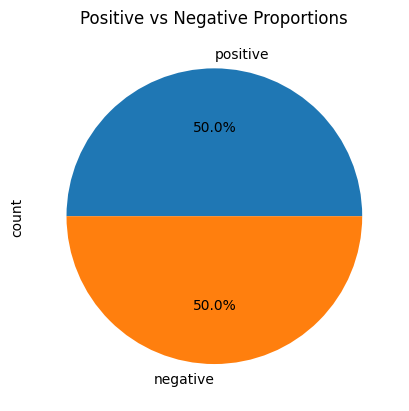

In [ ]:
data['sentiment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Positive vs Negative Proportions')
plt.show()


In [ ]:
# Checking class imbalance
print(data['sentiment'].value_counts(normalize=True))

sentiment
positive    0.5
negative    0.5
Name: proportion, dtype: float64


Both positive and negative classes have a proportion of 0.5, which means that 50% of the dataset belongs to the positive class and 50% belongs to the negative class (the data is balanced)

## Model Training/ Model Evaluation

In [ ]:
# Define features and labels
X = data['cleaned_review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# Initialize the vectorizer
vectorizer = CountVectorizer()

# Fit and transform the training data
X_train_transformed = vectorizer.fit_transform(X_train)

# Transform the test data using the same vectorizer
X_test_transformed = vectorizer.transform(X_test)


In [ ]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=1,max_df=2,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train=cv.fit_transform(train_reviews_data)
cv_test=cv.transform(test_reviews_data)

print('BOW_cv_train:',cv_train.shape)
print('BOW_cv_test:',cv_test.shape)


BOW_cv_train: (37500, 6368150)
BOW_cv_test: (12500, 6368150)


# Naive Bayes Classifier

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
cv = TfidfVectorizer(max_features=5000)
x = cv.fit_transform(data['cleaned_review']).toarray()
y=  data['sentiment']

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Split data

mnb = MultinomialNB()
mnb.fit(x_train, y_train)

MultinomialNB()

In [ ]:
prediction = mnb.predict(x_test)

In [ ]:
comparison_df = pd.DataFrame(np.c_[y_test, prediction], columns=['Actual_Labels', 'Predicted_Labels'])

print(comparison_df)

     Actual_Labels Predicted_Labels
0         positive         negative
1         positive         positive
2         negative         negative
3         positive         positive
4         negative         negative
...            ...              ...
9995      negative         negative
9996      positive         positive
9997      positive         positive
9998      negative         negative
9999      positive         negative

[10000 rows x 2 columns]


In [ ]:
import pickle
import numpy as np
import pandas as pd

# Load the CountVectorizer and model from pickle files
save_cv = pickle.load(open('Count-vectorizer.pkl', 'rb'))
model = pickle.load(open('Sentiment.pkl', 'rb'))

# Assuming you have X_test (input text) and y_test (actual labels)
X_test = ["This product is amazing!", "I really dislike this experience."]
y_test = [1, 0]  # Actual labels

# Transform X_test using the CountVectorizer
X_test_transformed = save_cv.transform(X_test)

# Make predictions using the model
predictions = model.predict(X_test_transformed)

# Create a DataFrame to compare actual and predicted labels
comparison_df = pd.DataFrame(np.c_[y_test, predictions], columns=['Actual_Labels', 'Predicted_Labels'])

# Print the comparison DataFrame
print(comparison_df)

# Save the trained model to a new file
with open('Saved_Sentiment_Model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")


  Actual_Labels Predicted_Labels
0             1         positive
1             0         positive
Model saved successfully.


In [ ]:
accuracy = accuracy_score(y_test, prediction)
print(f'Accuracy: {accuracy}')

print('\nClassification Report:')
print(classification_report(y_test, prediction))


Accuracy: 0.8518

Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.85      0.85      4961
    positive       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
cm = confusion_matrix(y_test, prediction)

Comparison of the Actual Labels and Predicted Labels

In [ ]:
conf_matrix = confusion_matrix(comparison_df['Actual_Labels'], comparison_df['Predicted_Labels'])
print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[4184  777]
 [ 736 4303]]


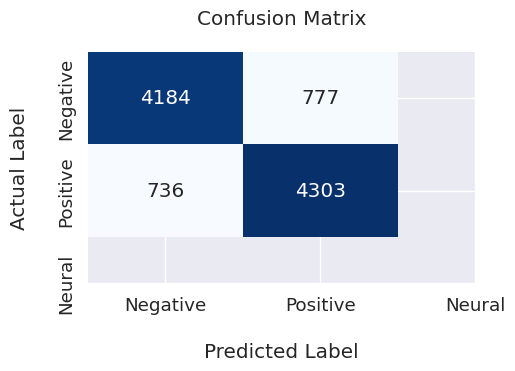

In [ ]:
def plot_confusion_matrix(cm, classes, title):
    plt.figure(figsize=(5, 3))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes)

    plt.title(title, pad=20)
    plt.xlabel('Predicted Label', labelpad=20)
    plt.ylabel('Actual Label', labelpad=20)
    plt.show()


plot_confusion_matrix(cm,
                      classes=["Negative", "Positive","Neural"],
                      title="Confusion Matrix")

Save the Models

In [ ]:
import pickle  # Import the pickle module
# Save the CountVectorizer and the model
pickle.dump(cv, open('Count-vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('Sentiment.pkl', 'wb'))


In [ ]:
import pickle
# Load the CountVectorizer and model from pickle files
save_cv = pickle.load(open('Count-vectorizer.pkl', 'rb'))
model = pickle.load(open('Sentiment.pkl', 'rb'))


In [ ]:
X_test = ["This product is great!", "I hate the service."]
y_test = [1, 0]

# Transform X_test using the CountVectorizer
X_test_transformed = save_cv.transform(X_test)

# Make predictions using the model
predictions = model.predict(X_test_transformed)

# Create a DataFrame to compare actual and predicted labels
comparison_df = pd.DataFrame(np.c_[y_test, predictions], columns=['Actual_Labels', 'Predicted_Labels'])

# Print the comparison DataFrame
print(comparison_df)

# Save the trained model to a new file
with open('Saved_Sentiment_Model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully.")

  Actual_Labels Predicted_Labels
0             1         positive
1             0         negative
Model saved successfully.
